In [ ]:
# evaluation of a model using some features chosen with anova f-test
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler, MaxAbsScaler,  QuantileTransformer
from google.colab import drive
drive.mount('/content/drive')
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (Y) variables
	X = dataset[:, :-1]
	Y = dataset[:,-1]
	return X, Y
 
# feature selection
def select_features(X_train, Y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_classif, k=1200)
	# learn relationship from training data
	fs.fit(X_train, Y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, Y = load_dataset('/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/MORDRED(2D)/VRK2_mordred(2D)_apppendscore_dropsmiles.csv')

# scaling X

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split into train and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2)

# feature selection

X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)

# fit the model

model = SVC()
model.fit(X_train_fs, Y_train)

# evaluate the model

yhat = model.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(Y_test, yhat)

print('Accuracy: %.2f' % (accuracy*100))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 42.86


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  20   21   24   29   31   32   33  652  782  793  794  798  799  865
  866  867  868  869  870  871  872  873  874  875  876  877  878  891
  892  893  894  895  896  898  900  904  910  912  913  916  917  918
  921  923  929  930  931  932  933  934  935  936  937  938  939  942
  943  944  945  946  947  948  949  950  951  952  953  954  955  956
  957  958  959  960  961  962  963  964  965  966  967  968  969  970
  971  972  973  974  975  977  979  983  989  991  992  995  996  997
 1000 1002 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1021
 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035
 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049
 1050 1051 1052 1053 1054 1056 1058 1062 1068 1070 1071 1074 1075 1079
 1081 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1100 1101
 1102 1103 1104 1105 1106 1107 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


(85, 1826)
(196, 1826)
{'model__var_smoothing': 3.7665768415992956e-07, 'pca__n_components': 22}
train 정확도: 0.8529
test 정확도: 0.5882
total 정확도: 0.8000
others 정확도: 0.7925
[[36  0  3  1]
 [ 0  2  0  0]
 [ 0  0 10  2]
 [ 3  0  1 10]]
[[6 0 1 2]
 [1 0 0 0]
 [2 0 1 0]
 [1 0 0 3]]
[[42  0  4  3]
 [ 1  2  0  0]
 [ 2  0 11  2]
 [ 4  0  1 13]]
[[42  0  7  4]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]


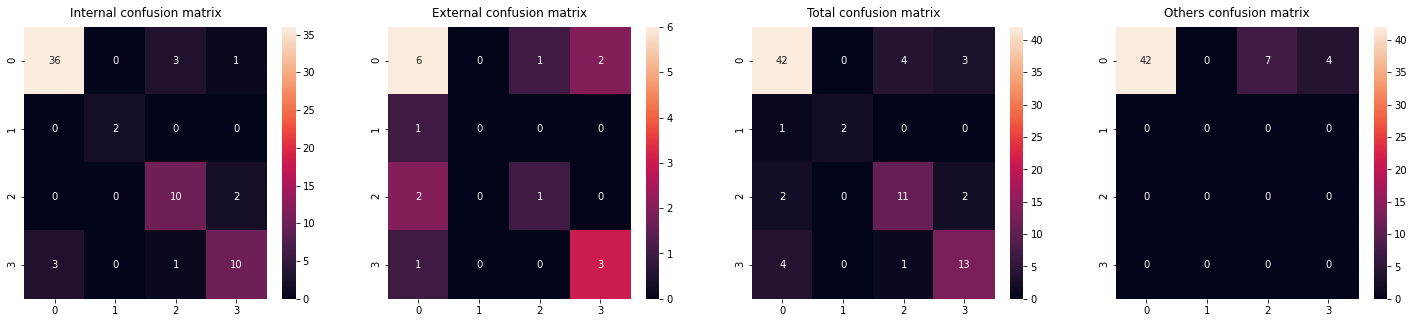

              precision    recall  f1-score   support

         0.0       0.60      0.67      0.63         9
         1.0       0.00      0.00      0.00         1
         2.0       0.50      0.33      0.40         3
         3.0       0.60      0.75      0.67         4

    accuracy                           0.59        17
   macro avg       0.43      0.44      0.42        17
weighted avg       0.55      0.59      0.56        17



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
##파이프라인, 그리드서치(머신러닝)

import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, KFold,  GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler, MaxAbsScaler,  QuantileTransformer
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.decomposition import PCA
from sklearn.utils.fixes import loguniform
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from tensorflow.python.keras.utils import np_utils
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from google.colab import drive
drive.mount('/content/drive')

seed=0
np.random.seed(seed)

#데이터 입력
df = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/MORDRED(3D)/VRK2_MORDRED(3D)_apppendscore_dropsmiles.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/MORDRED(3D)/VRK2add_MORDRED(3D)_apppendscore_dropsmiles.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/Others/MORDRED(3D)/Others_MORDRED(3D)_appendscore_dropsmiles.csv')
df3 = pd.concat([df,df1,df2])
data = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/Others/MORDRED(3D)/Drug_MORDRED(3D)_appendscore_dropsmiles.csv')

#데이터 분류
#dataset = df.values
#X = dataset[:,:-1]
#Y = dataset[:,-1]

#dataset2 = df2.values
#X_ex = dataset2[:,:-1]
#Y_ex = dataset2[:,-1]

dataset3 = df3.values
X = dataset3[:,:-1]
Y = dataset3[:,-1]

data = data.values
X_others =data[:,:-1]
Y_others =data[:,-1]

#print(X.shape)
#print(Y.shape)
#print(X_others.shape)
#print(Y_others.shape)

#복합샘플링

randomover = RandomOverSampler(random_state=seed)
X_re, Y_re = randomover.fit_resample(X, Y)

#ada = ADASYN(random_state=seed)
#X_re1, Y_re1 = ada.fit_resample(X_re, Y_re)

#smote = SMOTE(random_state=seed)
#X_re2, Y_re2 = smote.fit_resample(X_re1, Y_re1)

#smoteenn = SMOTEENN(random_state=seed)
#X_re, Y_re = smoteenn.fit_resample(X, Y)

print(X.shape)
print(X_re.shape)

#데이터 split

train_input, test_input, train_target, test_target = train_test_split(X, Y, test_size=0.2, random_state=seed)

#파이프라인 생성

pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA()),('model', GaussianNB())])
param_grid = [{'pca__n_components':[22], 'model__var_smoothing': loguniform(1e-10, 1e-5)}]
grid = RandomizedSearchCV(pipe, param_grid, n_jobs=-1, n_iter= 500, cv=5, scoring='accuracy')  
grid.fit(train_input,train_target)

pred_train = grid.predict(train_input)
pred_test = grid.predict(test_input)
pred_total = grid.predict(X)
pred_others = grid.predict(X_others)
accuracy = accuracy_score(train_target, pred_train)
ex_accuracy = accuracy_score(test_target, pred_test)
tot_accuracy = accuracy_score(Y, pred_total)
others_accuracy = accuracy_score(Y_others, pred_others)

print(grid.best_params_)

print('train 정확도: {0:.4f}'.format(accuracy))
print('test 정확도: {0:.4f}'.format(ex_accuracy))
print('total 정확도: {0:.4f}'.format(tot_accuracy))
print('others 정확도: {0:.4f}'.format(others_accuracy))

conf = confusion_matrix(train_target, pred_train, labels=[0,1,2,3])
exconf = confusion_matrix(test_target, pred_test, labels=[0,1,2,3])
totconf = confusion_matrix(Y, pred_total, labels=[0,1,2,3])
othersconf = confusion_matrix(Y_others, pred_others, labels=[0,1,2,3])

print(conf)
print(exconf)
print(totconf)
print(othersconf)  

#모델 저장 

model = grid.best_estimator_

saved_model = joblib.dump(model,'/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/VRK2_0416_6.pkl')

#standard scaling만:0.5(MinMax도) Normalizer만:0.6(0.5, 0.6, 0.53) Binarizer만: 0.4 RobustScaler만:0.65 스케일링은 RobustScaler로

#0331: Robust만 시행 0331_2: Robust, kernel='linear', C=1 0331_3: Robust, kernal rbf, C=36, gamma=202 0.91 0.45 0.83 0331_4: Robust, kernal rbf, C=0.509, gamma=880 random_state=52, pca component 3 0.50 0.65 0.53

#0401_1 0.91 0.45 0.83

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(25, 5))
sns.heatmap(conf, annot=True, ax=ax[0])
ax[0].set_title('Internal confusion matrix', pad = 10)
sns.heatmap(exconf, annot=True, ax=ax[1])
ax[1].set_title('External confusion matrix', pad = 10)
sns.heatmap(totconf, annot=True, ax=ax[2])
ax[2].set_title('Total confusion matrix', pad = 10)
sns.heatmap(othersconf, annot=True, ax=ax[3])
ax[3].set_title('Others confusion matrix', pad = 10)

plt.show()

#Classification report

print(classification_report(test_target, pred_test))

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, KFold,  GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler, MaxAbsScaler,  QuantileTransformer
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.decomposition import PCA
from sklearn.utils.fixes import loguniform
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.naive_bayes import GaussianNB
from tensorflow.python.keras.utils import np_utils
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from google.colab import drive
drive.mount('/content/drive')

#검증용 자료 로드

df = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/Others/MORDRED(3D)/Drug_MORDRED(3D)_appendscore_dropsmiles.csv')

dataset = df.values
X = dataset[:,:-1]
Y = dataset[:,-1]

#모델 로드

loaded_model = joblib.load('/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/VRK2_0415_2.pkl')

#테스트

pred = grid.predict(X)
accuracy = accuracy_score(Y,pred)

print('정확도: {0:.4f}'.format(accuracy))

conf = confusion_matrix(Y,pred, labels=[0,1,2,3])

print(conf)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
정확도: 0.0000
[[0 0 0 0]
 [0 0 0 0]
 [5 0 0 0]
 [6 0 0 0]]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(85, 1826)
(196, 1826)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'model__gamma': 0.004028867929739211, 'pca__n_components': 43}
train 정확도: 0.9559
test 정확도: 0.5294
total 정확도: 0.8706
others 정확도: 1.0000
[[40  0  0  0]
 [ 0  2  0  0]
 [ 1  0  9  2]
 [ 0  0  0 14]]
[[9 0 0 0]
 [1 0 0 0]
 [3 0 0 0]
 [4 0 0 0]]
[[49  0  0  0]
 [ 1  2  0  0]
 [ 4  0  9  2]
 [ 4  0  0 14]]
[[53  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]


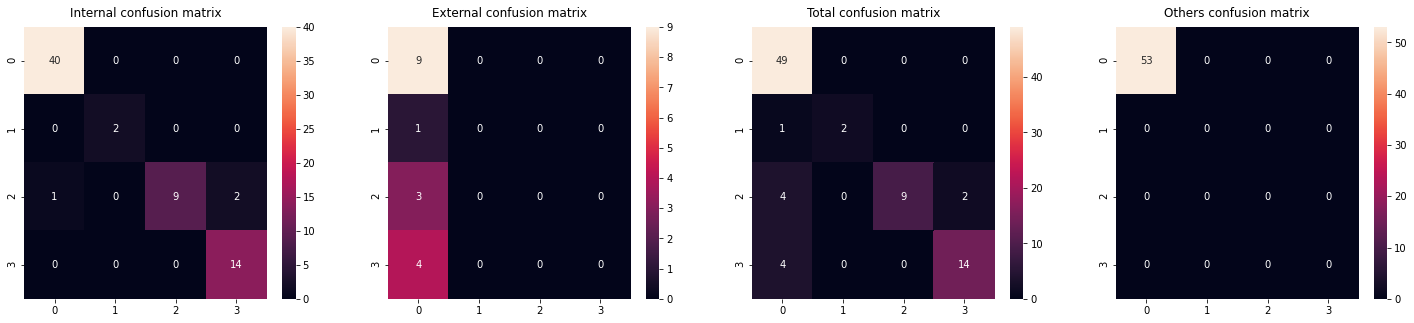

              precision    recall  f1-score   support

         0.0       0.53      1.00      0.69         9
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         4

    accuracy                           0.53        17
   macro avg       0.13      0.25      0.17        17
weighted avg       0.28      0.53      0.37        17



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, KFold,  GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler, MaxAbsScaler,  QuantileTransformer
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.decomposition import PCA
from sklearn.utils.fixes import loguniform
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from tensorflow.python.keras.utils import np_utils
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from google.colab import drive
drive.mount('/content/drive')

seed=0
np.random.seed(seed)

#데이터 입력
df = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/MORDRED(3D)/VRK2_MORDRED(3D)_apppendscore_dropsmiles.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/MORDRED(3D)/VRK2add_MORDRED(3D)_apppendscore_dropsmiles.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/Others/MORDRED(3D)/Others_MORDRED(3D)_appendscore_dropsmiles.csv')
df3 = pd.concat([df,df1,df2])
data = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/Others/MORDRED(3D)/Drug_MORDRED(3D)_appendscore_dropsmiles.csv')

#데이터 분류
#dataset = df.values
#X = dataset[:,:-1]
#Y = dataset[:,-1]

#dataset2 = df2.values
#X_ex = dataset2[:,:-1]
#Y_ex = dataset2[:,-1]

dataset3 = df3.values
X = dataset3[:,:-1]
Y = dataset3[:,-1]

data = data.values
X_others =data[:,:-1]
Y_others =data[:,-1]

#print(X.shape)
#print(Y.shape)
#print(X_others.shape)
#print(Y_others.shape)

#복합샘플링

randomover = RandomOverSampler(random_state=seed)
X_re, Y_re = randomover.fit_resample(X, Y)

#ada = ADASYN(random_state=seed)
#X_re1, Y_re1 = ada.fit_resample(X_re, Y_re)

#smote = SMOTE(random_state=seed)
#X_re2, Y_re2 = smote.fit_resample(X_re1, Y_re1)

#smoteenn = SMOTEENN(random_state=seed)
#X_re, Y_re = smoteenn.fit_resample(X, Y)

print(X.shape)
print(X_re.shape)

#데이터 split

train_input, test_input, train_target, test_target = train_test_split(X, Y, test_size=0.2, random_state=seed)

#파이프라인 생성

pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA()),('model', SVC(random_state=seed))])
param_grid = [{'pca__n_components':list(range(10,500)), 'model__gamma': loguniform(1e-5,1), 'model__kernel':['linear','rbf','sigmoid','poly','precomputed']}]
grid = RandomizedSearchCV(pipe, param_grid, n_jobs=-1, n_iter= 500, cv=5, scoring='accuracy')  
grid.fit(train_input,train_target)

pred_train = grid.predict(train_input)
pred_test = grid.predict(test_input)
pred_total = grid.predict(X)
pred_others = grid.predict(X_others)
accuracy = accuracy_score(train_target, pred_train)
ex_accuracy = accuracy_score(test_target, pred_test)
tot_accuracy = accuracy_score(Y, pred_total)
others_accuracy = accuracy_score(Y_others, pred_others)

print(grid.best_params_)

print('train 정확도: {0:.4f}'.format(accuracy))
print('test 정확도: {0:.4f}'.format(ex_accuracy))
print('total 정확도: {0:.4f}'.format(tot_accuracy))
print('others 정확도: {0:.4f}'.format(others_accuracy))

conf = confusion_matrix(train_target, pred_train, labels=[0,1,2,3])
exconf = confusion_matrix(test_target, pred_test, labels=[0,1,2,3])
totconf = confusion_matrix(Y, pred_total, labels=[0,1,2,3])
othersconf = confusion_matrix(Y_others, pred_others, labels=[0,1,2,3])

print(conf)
print(exconf)
print(totconf)
print(othersconf)  

#모델 저장 

model = grid.best_estimator_

saved_model = joblib.dump(model,'/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/VRK2_0416_svc2.pkl')

#standard scaling만:0.5(MinMax도) Normalizer만:0.6(0.5, 0.6, 0.53) Binarizer만: 0.4 RobustScaler만:0.65 스케일링은 RobustScaler로

#0331: Robust만 시행 0331_2: Robust, kernel='linear', C=1 0331_3: Robust, kernal rbf, C=36, gamma=202 0.91 0.45 0.83 0331_4: Robust, kernal rbf, C=0.509, gamma=880 random_state=52, pca component 3 0.50 0.65 0.53

#0401_1 0.91 0.45 0.83

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(25, 5))
sns.heatmap(conf, annot=True, ax=ax[0])
ax[0].set_title('Internal confusion matrix', pad = 10)
sns.heatmap(exconf, annot=True, ax=ax[1])
ax[1].set_title('External confusion matrix', pad = 10)
sns.heatmap(totconf, annot=True, ax=ax[2])
ax[2].set_title('Total confusion matrix', pad = 10)
sns.heatmap(othersconf, annot=True, ax=ax[3])
ax[3].set_title('Others confusion matrix', pad = 10)

plt.show()

#Classification report

print(classification_report(test_target, pred_test))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(85, 1826)
(196, 1826)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'pca__n_components': 12}
train 정확도: 1.0000
test 정확도: 0.5294
total 정확도: 0.8367
others 정확도: 0.9245
[[40  0  0  0]
 [ 0  2  0  0]
 [ 0  0 12  0]
 [ 0  0  0 14]]
[[7 0 1 1]
 [1 0 0 0]
 [2 0 1 0]
 [3 0 0 1]]
[[47  0  1  1]
 [13 36  0  0]
 [ 9  0 40  0]
 [ 8  0  0 41]]
[[49  0  1  3]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]


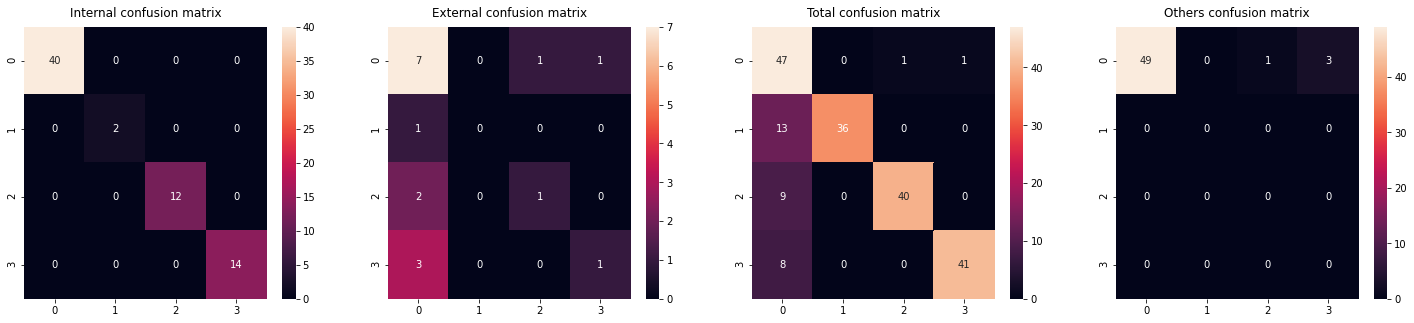

              precision    recall  f1-score   support

         0.0       0.54      0.78      0.64         9
         1.0       0.00      0.00      0.00         1
         2.0       0.50      0.33      0.40         3
         3.0       0.50      0.25      0.33         4

    accuracy                           0.53        17
   macro avg       0.38      0.34      0.34        17
weighted avg       0.49      0.53      0.49        17



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
##파이프라인, 그리드서치(머신러닝)

import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, KFold,  GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler, MaxAbsScaler,  QuantileTransformer
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.decomposition import PCA
from sklearn.utils.fixes import loguniform
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from xgboost import XGBClassifier
from tensorflow.python.keras.utils import np_utils
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from google.colab import drive
drive.mount('/content/drive')

seed=0
np.random.seed(seed)

#데이터 입력
df = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/MORDRED(3D)/VRK2_MORDRED(3D)_apppendscore_dropsmiles.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/MORDRED(3D)/VRK2add_MORDRED(3D)_apppendscore_dropsmiles.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/Others/MORDRED(3D)/Others_MORDRED(3D)_appendscore_dropsmiles.csv')
df3 = pd.concat([df,df1,df2])
data = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/Others/MORDRED(3D)/Drug_MORDRED(3D)_appendscore_dropsmiles.csv')

#데이터 분류
#dataset = df.values
#X = dataset[:,:-1]
#Y = dataset[:,-1]

#dataset2 = df2.values
#X_ex = dataset2[:,:-1]
#Y_ex = dataset2[:,-1]

dataset3 = df3.values
X = dataset3[:,:-1]
Y = dataset3[:,-1]

data = data.values
X_others =data[:,:-1]
Y_others =data[:,-1]

#print(X.shape)
#print(Y.shape)
#print(X_others.shape)
#print(Y_others.shape)

#복합샘플링

randomover = RandomOverSampler(random_state=seed)
X_re, Y_re = randomover.fit_resample(X, Y)

#ada = ADASYN(random_state=seed)
#X_re1, Y_re1 = ada.fit_resample(X_re, Y_re)

#smote = SMOTE(random_state=seed)
#X_re2, Y_re2 = smote.fit_resample(X_re1, Y_re1)

#smoteenn = SMOTEENN(random_state=seed)
#X_re, Y_re = smoteenn.fit_resample(X, Y)

print(X.shape)
print(X_re.shape)

#데이터 split

train_input, test_input, train_target, test_target = train_test_split(X, Y, test_size=0.2, random_state=seed)

#파이프라인 생성

pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA()),('model', XGBClassifier())])
param_grid = [{'pca__n_components':[12]}]
grid = RandomizedSearchCV(pipe, param_grid, n_jobs=-1, n_iter=100, cv=5, scoring='accuracy')  
grid.fit(train_input,train_target)

pred_train = grid.predict(train_input)
pred_test = grid.predict(test_input)
pred_total = grid.predict(X)
pred_others = grid.predict(X_others)
accuracy = accuracy_score(train_target, pred_train)
ex_accuracy = accuracy_score(test_target, pred_test)
tot_accuracy = accuracy_score(Y_re, pred_total)
others_accuracy = accuracy_score(Y_others, pred_others)

print(grid.best_params_)

print('train 정확도: {0:.4f}'.format(accuracy))
print('test 정확도: {0:.4f}'.format(ex_accuracy))
print('total 정확도: {0:.4f}'.format(tot_accuracy))
print('others 정확도: {0:.4f}'.format(others_accuracy))

conf = confusion_matrix(train_target, pred_train, labels=[0,1,2,3])
exconf = confusion_matrix(test_target, pred_test, labels=[0,1,2,3])
totconf = confusion_matrix(Y, pred_total, labels=[0,1,2,3])
othersconf = confusion_matrix(Y_others, pred_others, labels=[0,1,2,3])

print(conf)
print(exconf)
print(totconf)
print(othersconf)  

#모델 저장 

model = grid.best_estimator_

saved_model = joblib.dump(model,'/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/VRK2_0419_xg1.pkl')

#standard scaling만:0.5(MinMax도) Normalizer만:0.6(0.5, 0.6, 0.53) Binarizer만: 0.4 RobustScaler만:0.65 스케일링은 RobustScaler로

#0331: Robust만 시행 0331_2: Robust, kernel='linear', C=1 0331_3: Robust, kernal rbf, C=36, gamma=202 0.91 0.45 0.83 0331_4: Robust, kernal rbf, C=0.509, gamma=880 random_state=52, pca component 3 0.50 0.65 0.53

#0401_1 0.91 0.45 0.83

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(25, 5))
sns.heatmap(conf, annot=True, ax=ax[0])
ax[0].set_title('Internal confusion matrix', pad = 10)
sns.heatmap(exconf, annot=True, ax=ax[1])
ax[1].set_title('External confusion matrix', pad = 10)
sns.heatmap(totconf, annot=True, ax=ax[2])
ax[2].set_title('Total confusion matrix', pad = 10)
sns.heatmap(othersconf, annot=True, ax=ax[3])
ax[3].set_title('Others confusion matrix', pad = 10)

plt.show()

#Classification report

print(classification_report(test_target, pred_test))